In [1]:
import pandas as pd
import geopandas as gpd
import shapely
import numpy as np
import matplotlib.pyplot as plt

# OPTION 1: Load from pre-extracted file (recommended for low memory systems)
# First run: python extract_recent_data.py
# Then uncomment this section and comment out Option 2

# print('Loading pre-extracted data...')
# crime_df = pd.read_csv('../data/NYPD_data_2020plus.csv', parse_dates=['CMPLNT_FR_DT'])
# crime_df = crime_df.rename(columns={
#     'CMPLNT_NUM': 'ID',
#     'CMPLNT_FR_DT': 'Date',
#     'OFNS_DESC': 'Primary Type',
#     'X_COORD_CD': 'x',
#     'Y_COORD_CD': 'y'
# })
# crime_df['Year'] = crime_df['Date'].dt.year
# crime_df['Month'] = crime_df['Date'].dt.month
# crime_df['Date'] = crime_df['Date'].dt.date
# print(f"Loaded {len(crime_df):,} records from {crime_df['Date'].min()} to {crime_df['Date'].max()}")

# OPTION 2: Load directly from large file (may cause memory errors)
print('Loading NYPD crime data directly (this may take a few minutes)...')

cols_to_use = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'OFNS_DESC', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
chunk_size = 50000
chunks = []
total_processed = 0
total_kept = 0

for i, chunk in enumerate(pd.read_csv('../../NYPD_data.csv', usecols=cols_to_use, chunksize=chunk_size, low_memory=False)):
    total_processed += len(chunk)
    
    # Parse dates efficiently
    chunk['CMPLNT_FR_DT'] = pd.to_datetime(chunk['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
    
    # Filter immediately to reduce memory
    chunk = chunk.dropna(subset=['CMPLNT_FR_DT'])
    chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
    chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
    chunk = chunk[chunk['Year'] >= 2020]
    
    # Clean coordinates immediately
    chunk = chunk.dropna(subset=['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'])
    chunk = chunk[(chunk['X_COORD_CD'] != 0) & (chunk['Y_COORD_CD'] != 0)]
    chunk = chunk[(chunk['Latitude'] != 0) & (chunk['Longitude'] != 0)]
    
    if len(chunk) > 0:
        total_kept += len(chunk)
        chunks.append(chunk)
    
    if (i + 1) % 10 == 0:
        print(f'Processed {total_processed:,} rows, kept {total_kept:,} records (chunk {i+1})...')

print(f'\nTotal processed: {total_processed:,} rows, kept {total_kept:,} records')

if chunks:
    crime_df = pd.concat(chunks, ignore_index=True)
    crime_df = crime_df.rename(columns={
        'CMPLNT_NUM': 'ID',
        'CMPLNT_FR_DT': 'Date',
        'OFNS_DESC': 'Primary Type',
        'X_COORD_CD': 'x',
        'Y_COORD_CD': 'y'
    })
    crime_df['Date'] = crime_df['Date'].dt.date
    
    print(f"\nFinal dataset: {len(crime_df):,} crime records")
    print(f"Date range: {crime_df['Date'].min()} to {crime_df['Date'].max()}")
    print(f"Years included: {sorted(crime_df['Year'].unique())}")
    print(f"Memory usage: {crime_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
else:
    print("ERROR: No data was loaded!")

# Extract data for visualization (adjust year as needed)
print('\nFiltering for visualization year...')
year_crime_df = crime_df.loc[crime_df['Year'] == 2024]  # Adjust year as needed
print(f'Data for visualization: {len(year_crime_df):,} records')

Loading NYPD crime data directly (this may take a few minutes)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 500,000 rows, kept 499,011 records (chunk 10)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 1,000,000 rows, kept 997,851 records (chunk 20)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 1,500,000 rows, kept 1,496,353 records (chunk 30)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 2,000,000 rows, kept 1,994,008 records (chunk 40)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 2,500,000 rows, kept 2,487,766 records (chunk 50)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 3,000,000 rows, kept 2,512,496 records (chunk 60)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 3,500,000 rows, kept 2,512,496 records (chunk 70)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 4,000,000 rows, kept 2,512,496 records (chunk 80)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 4,500,000 rows, kept 2,512,496 records (chunk 90)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 5,000,000 rows, kept 2,512,496 records (chunk 100)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 5,500,000 rows, kept 2,512,496 records (chunk 110)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 6,000,000 rows, kept 2,512,496 records (chunk 120)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 6,500,000 rows, kept 2,512,496 records (chunk 130)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 7,000,000 rows, kept 2,512,496 records (chunk 140)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 7,500,000 rows, kept 2,512,496 records (chunk 150)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 8,000,000 rows, kept 2,512,496 records (chunk 160)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 8,500,000 rows, kept 2,512,496 records (chunk 170)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 9,000,000 rows, kept 2,512,496 records (chunk 180)...


C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year'] = chunk['CMPLNT_FR_DT'].dt.year
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Month'] = chunk['CMPLNT_FR_DT'].dt.month  # Add month for visualization
C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3690219040.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Processed 9,491,946 rows, kept 2,512,496 records (chunk 190)...

Total processed: 9,491,946 rows, kept 2,512,496 records

Final dataset: 2,512,496 crime records
Date range: 2020-01-01 to 2024-12-31
Years included: [2020, 2021, 2022, 2023, 2024]
Memory usage: 724.40 MB

Filtering for visualization year...
Data for visualization: 565,091 records


In [ ]:
def plot_crime_data(month_crime_df, frame_i, year=2024):
    print(f'Creating plot for month {frame_i}')
    
    # Create output directory if it doesn't exist
    import os
    os.makedirs('data/visualisation', exist_ok=True)
    
    # Load NYC boroughs shapefile
    path = '../data/shapefile/nyc_boroughs.shp'
    nyc = gpd.read_file(path)
    # Transform to WGS84 to match crime data
    nyc = nyc.to_crs("EPSG:4326")
    nyc = nyc.dissolve()
    
    crs = "EPSG:4326"
    gdf = gpd.GeoDataFrame(month_crime_df, geometry=gpd.points_from_xy(month_crime_df.Longitude, month_crime_df.Latitude), crs=crs)
    
    # Use shapefile bounds instead of data bounds for consistent grid
    xmin, ymin, xmax, ymax = nyc.total_bounds
    n_x_cells = 50
    x_cell_size = (xmax - xmin) / n_x_cells
    n_y_cells = round(((ymax - ymin)/(xmax - xmin))*n_x_cells)
    y_cell_size = (ymax - ymin) / n_y_cells
    
    # Get NYC geometry for filtering
    nyc_geom = nyc.geometry.values[0]
    
    # Only create cells that intersect with NYC (like Chicago version)
    grid_cells = []
    for x0 in np.arange(xmin, xmax+x_cell_size, x_cell_size):
        for y0 in np.arange(ymin, ymax+y_cell_size, y_cell_size):
            x1 = x0 + x_cell_size
            y1 = y0 + y_cell_size
            box = shapely.geometry.box(x0, y0, x1, y1)
            if nyc_geom.intersects(box):
                grid_cells.append(box)
    
    cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=crs)
    
    merged = gpd.sjoin(gdf, cell, how='left', predicate='within')
    merged['n_crimes'] = 0
    dissolve = merged.dissolve(by="index_right", aggfunc="count")
    cell['n_crimes'] = 0
    cell.loc[dissolve.index, 'n_crimes'] = dissolve.n_crimes.values
    
    vmax = cell.n_crimes.mean() + 2*cell.n_crimes.std()
    ax = cell.plot(column='n_crimes', figsize=(12, 8), vmax=vmax, cmap='jet', edgecolor=None)
    
    # Overlay borough boundaries
    nyc.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
    
    ax.axis('off')
    plt.title(f'Crimes in NYC in {frame_i}/{year}')
    plt.savefig(f'data/visualisation/frame_{frame_i}.png', dpi=300, bbox_inches='tight')
    plt.close()

In [3]:
# Generate monthly visualizations
year = 2024  # Adjust as needed
for month in range(1,13):
    month_crime_df = year_crime_df.loc[year_crime_df['Month'] == month]
    if len(month_crime_df) > 0:
        plot_crime_data(month_crime_df, month, year)

Creating plot for month 1


Creating plot for month 2
Creating plot for month 3
Creating plot for month 4
Creating plot for month 5
Creating plot for month 6
Creating plot for month 7
Creating plot for month 8
Creating plot for month 9
Creating plot for month 10
Creating plot for month 11
Creating plot for month 12


In [4]:
import imageio
from PIL import Image

images = []
for filename in [f'frame_{frame_i}.png' for frame_i in range(1,13)]:
    try:
        img = imageio.imread('data/visualisation/' + filename)
        images.append(img)
    except FileNotFoundError:
        print(f"Skipping {filename} - file not found")

if images:
    # Resize all images to the same dimensions (use the first image's size)
    target_shape = images[0].shape
    resized_images = []
    
    for img in images:
        if img.shape != target_shape:
            # Convert to PIL Image, resize, and convert back to numpy array
            pil_img = Image.fromarray(img)
            pil_img = pil_img.resize((target_shape[1], target_shape[0]), Image.Resampling.LANCZOS)
            resized_images.append(np.array(pil_img))
        else:
            resized_images.append(img)
    
    imageio.mimsave('data/crime_nyc.gif', resized_images, 'GIF', fps=2)
    print("GIF created successfully")

C:\Users\Fradi\AppData\Local\Temp\ipykernel_38736\3003839307.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('data/visualisation/' + filename)


GIF created successfully


In [5]:
# Verify shapefile installation
import os
import glob

shapefile_dir = '../data/shapefile/'
os.makedirs(shapefile_dir, exist_ok=True)

print(f'Looking for shapefiles in: {os.path.abspath(shapefile_dir)}')
print('-' * 60)

shp_files = glob.glob(f'{shapefile_dir}*.shp')

if shp_files:
    print('✓ Shapefile(s) found!')
    for shp in shp_files:
        print(f'  • {os.path.basename(shp)}')
        # Try to read it
        try:
            import geopandas as gpd
            gdf = gpd.read_file(shp)
            print(f'    → Contains {len(gdf)} features')
            if 'boro_name' in gdf.columns:
                print(f'    → Boroughs: {", ".join(gdf["boro_name"].tolist())}')
        except Exception as e:
            print(f'    → Error reading: {e}')
else:
    print('✗ No shapefiles found')
    print('\nExpected location:')
    print(f'  {os.path.abspath(shapefile_dir)}')
    print('\nFiles currently in directory:')
    all_files = os.listdir(shapefile_dir) if os.path.exists(shapefile_dir) else []
    if all_files:
        for f in all_files:
            print(f'  • {f}')
    else:
        print('  (directory is empty)')
    
    print('\n💡 The code will work without the shapefile, but won\'t use proper borough boundaries for masking.')

Looking for shapefiles in: c:\Users\Fradi\OneDrive\Documents\tebourbi_behi\CrimeNYC\data\shapefile
------------------------------------------------------------
✓ Shapefile(s) found!
  • nyc_boroughs.shp
    → Contains 5 features


In [9]:
# Creating the mask matrix following Chicago approach
# Load data to get dimensions
train_data_temp = np.load('../data/train_data.npy')
n_y_cells, n_x_cells = train_data_temp.shape[1], train_data_temp.shape[2]

# Load NYC borough shapefiles for proper masking
path = '../data/shapefile/nyc_boroughs.shp'
nyc = gpd.read_file(path)
# Transform to WGS84 (EPSG:4326) to match crime data coordinates
nyc = nyc.to_crs("EPSG:4326")

# Use shapefile bounds for consistent grid (like Chicago version)
xmin, ymin, xmax, ymax = nyc.total_bounds

x_cell_size = (xmax - xmin) / n_x_cells
y_cell_size = (ymax - ymin) / n_y_cells

mask = np.ones((n_y_cells, n_x_cells))
grid = {"mask":[], "geometry":[]}

x_arange = np.arange(xmin, xmax+x_cell_size, x_cell_size)
y_arange = np.arange(ymin, ymax+y_cell_size, y_cell_size)

# Get NYC geometry for intersection checks
nyc_geom = nyc.dissolve().geometry.values[0]

for i, y0 in zip(range(n_y_cells-1, -1, -1), y_arange):
    for j, x0 in zip(range(n_x_cells), x_arange):
        x1 = x0 + x_cell_size
        y1 = y0 + y_cell_size
        box = shapely.geometry.box(x0, y0, x1, y1)
        
        # Check if box intersects with NYC geometry
        if nyc_geom.intersects(box):
            mask[i,j] = 1
            grid["mask"].append(1)
        else:
            mask[i,j] = 0
            grid["mask"].append(0)
        grid["geometry"].append(box)  # Always append geometry

print(f"Grid dimensions: {n_y_cells} x {n_x_cells}")
print(f"Total cells: {len(grid['geometry'])}, Masked cells: {sum(grid['mask'])}")

Grid dimensions: 67 x 50
Total cells: 3350, Masked cells: 1886


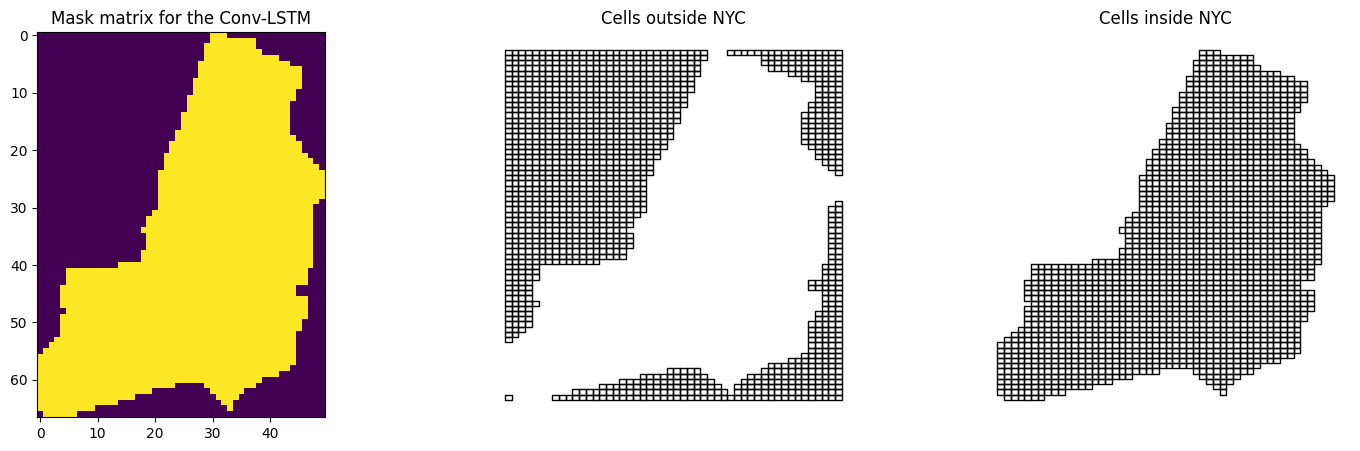

In [10]:
grid_df = gpd.GeoDataFrame(grid, crs="EPSG:4326")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].imshow(mask)
ax[0].set_title("Mask matrix for the Conv-LSTM")

# plot cells that are not in NYC
grid_df.loc[grid_df['mask'] == 0].plot(ax=ax[1], color='none', edgecolor='black')
ax[1].set_title("Cells outside NYC")
ax[1].axis("off")

# plot cells that are in NYC
grid_df.loc[grid_df['mask'] == 1].plot(ax=ax[2], color='none', edgecolor='black')
ax[2].set_title("Cells inside NYC")
ax[2].axis("off")

plt.show()

### Example: LSTM prediction with mask

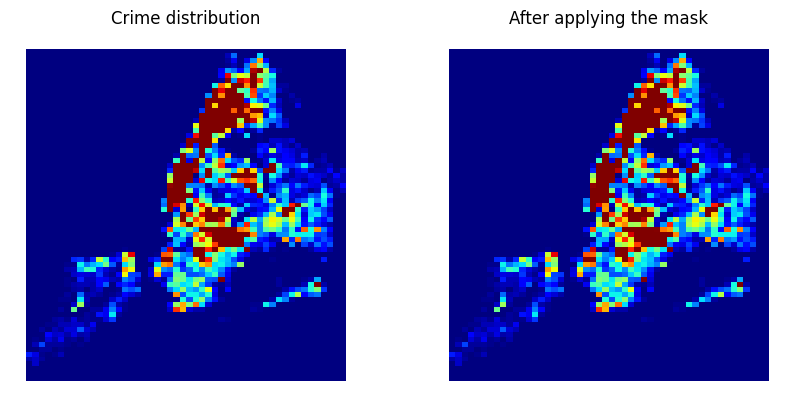

In [11]:
# Example visualization with crime data
if 'month_crime_df' in locals() and len(month_crime_df) > 0:
    crs = "EPSG:4326"
    gdf = gpd.GeoDataFrame(month_crime_df, geometry=gpd.points_from_xy(month_crime_df.Longitude, month_crime_df.Latitude), crs=crs)
    
    merged = gpd.sjoin(gdf, grid_df, how='left', predicate='within')
    merged['n_crimes'] = 0
    dissolve = merged.dissolve(by="index_right", aggfunc="count")
    grid_df['n_crimes'] = 0
    grid_df.loc[dissolve.index, 'n_crimes'] = dissolve.n_crimes.values
    vmax = grid_df.n_crimes.mean() + 2*grid_df.n_crimes.std()
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0] = grid_df.plot(ax=ax[0], column='n_crimes', figsize=(12, 8), vmax=vmax, cmap='jet', edgecolor=None)
    ax[0].axis('off')
    ax[0].set_title("Crime distribution")
    
    # apply the mask
    grid_df['n_crimes'] = grid_df['n_crimes'] * grid_df['mask']
    
    ax[1] = grid_df.plot(ax=ax[1], column='n_crimes', figsize=(12, 8), vmax=vmax, cmap='jet', edgecolor=None)
    ax[1].axis('off')
    ax[1].set_title("After applying the mask")
    
    plt.show()